<a href="https://colab.research.google.com/github/taylorec/Data-Science-with-Python/blob/main/CreditCard_FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project detects fraudulent credit card transactions using Random Forest and Gradient Boosting models.

## Content of data
The dataset contains transactions made by credit cards in September 2013 by European cardholders and presents transactions that occurred within a two day span, where there are 492 frauds out of 284,807 transactions. The dataset is highly unbalanced; the positive class (frauds) account for 0.172% of all transactions.

The data contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, the original features and additional background information about the data were left out. Features V1, V2, … V28 are the principal components obtained with PCA; the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.ensemble
import scipy
from sklearn.metrics import classification_report,accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv("/content/drive/MyDrive/Projects/Deploy/Credit Card Fraud Detection/Code and Files/creditcard.csv")

# Explore Data

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Text(0, 0.5, 'Frequency')

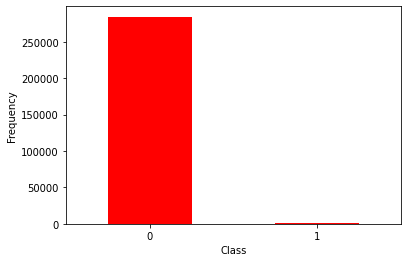

In [7]:
df['Class'].value_counts(sort = True).plot(kind = 'bar', rot=0, color= 'r')
plt.xlabel("Class")
plt.ylabel("Frequency")

In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
df[['Amount', 'Class']].groupby('Class').describe()

Amount                                                            
          count        mean         std  min   25%    50%     75%       max
Class                                                                      
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87

Class
0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Amount, dtype: object

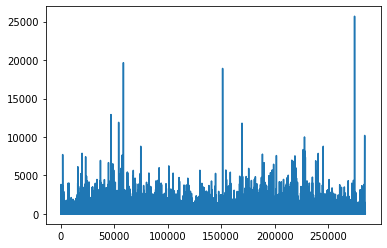

In [15]:
df[df['Class']==0].groupby('Class')['Amount'].plot()

Class
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Amount, dtype: object

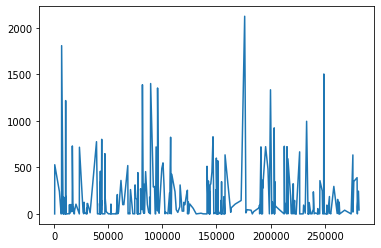

In [16]:
df[df['Class']==1].groupby('Class')['Amount'].plot()

<AxesSubplot:>

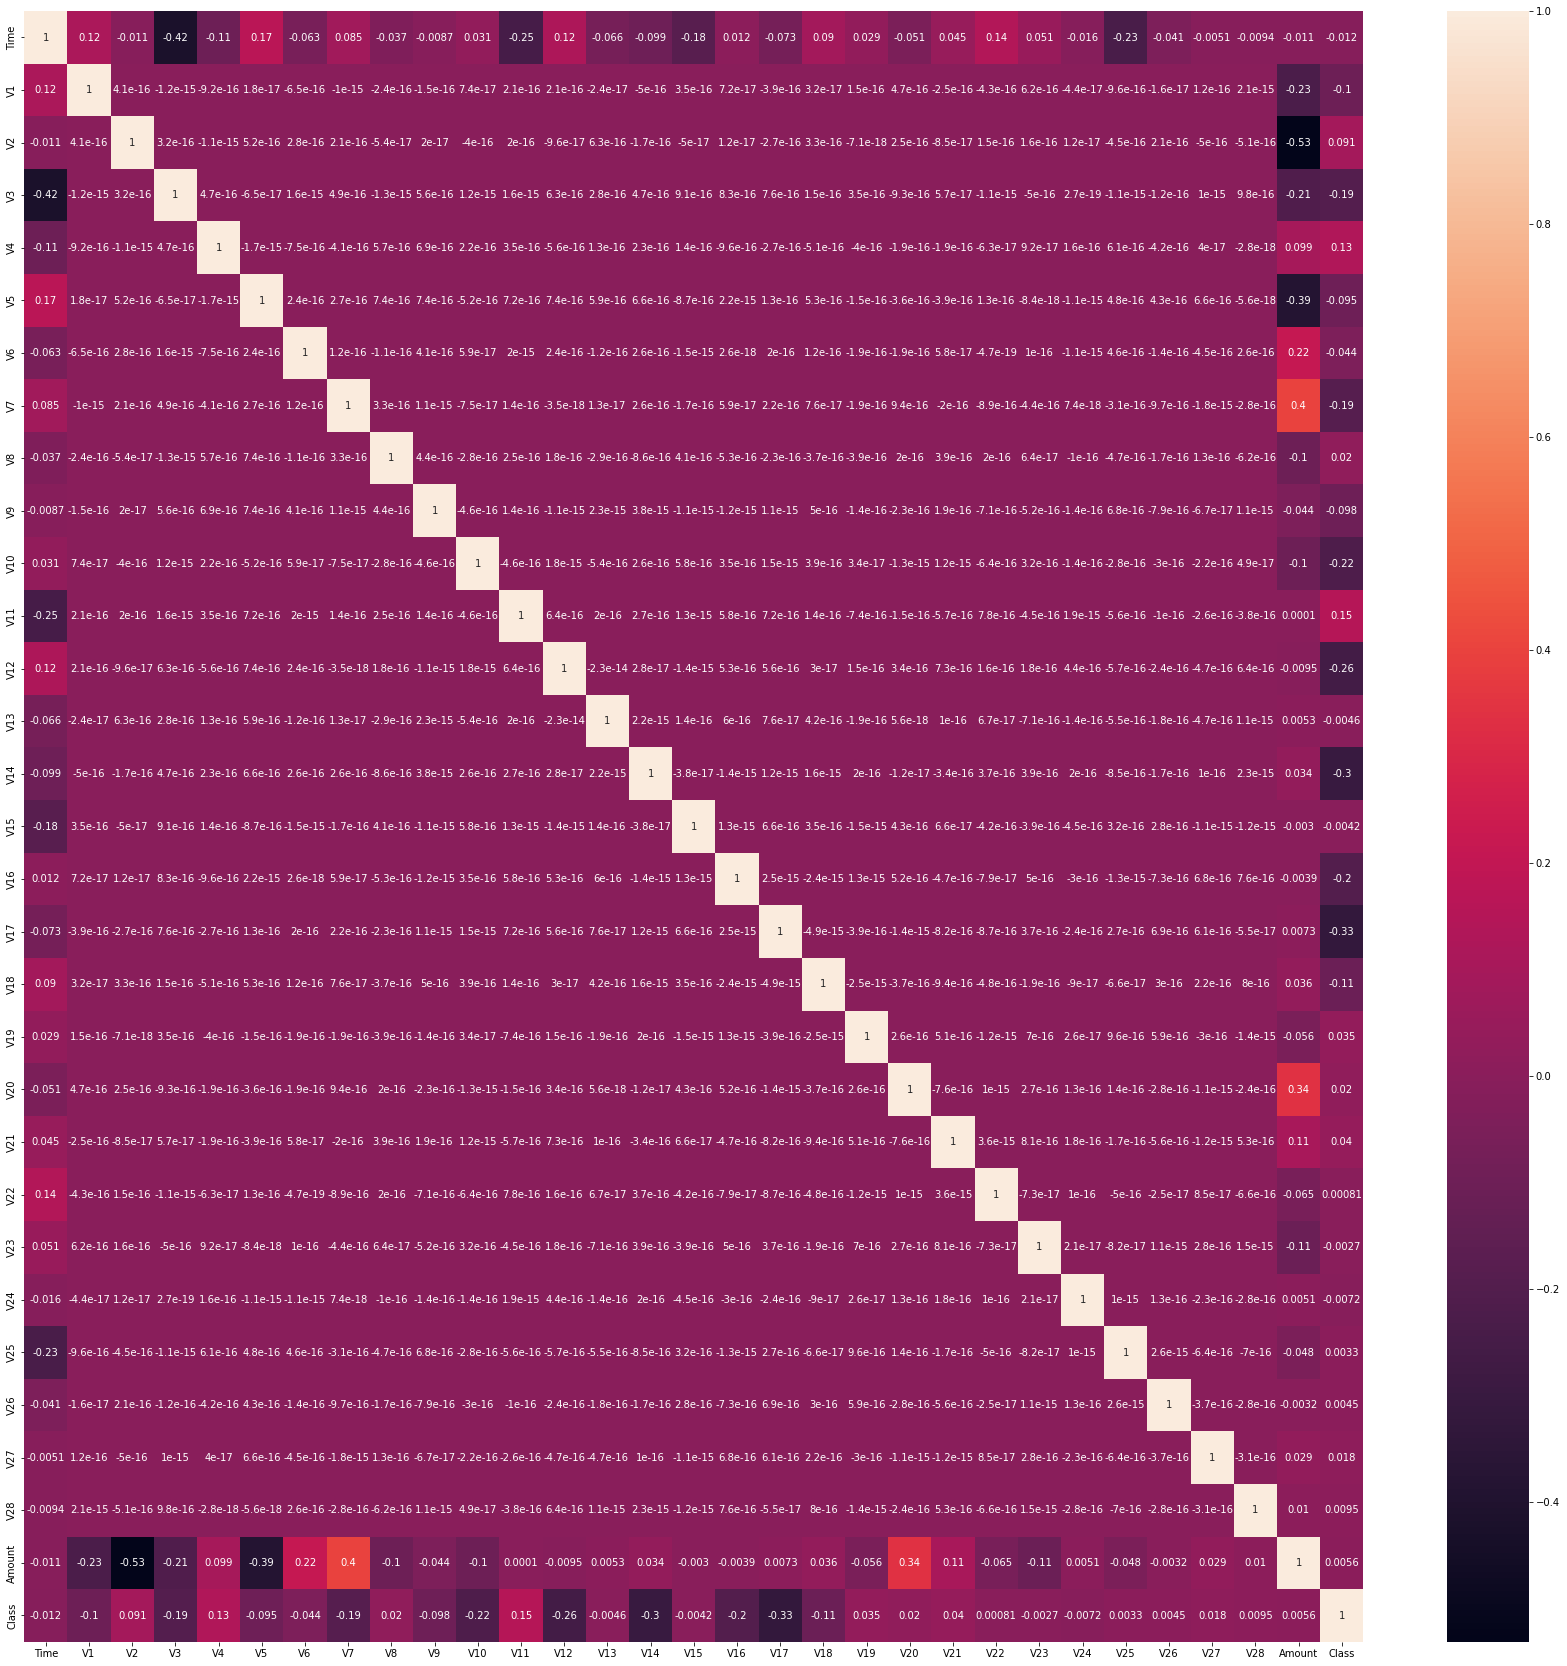

In [18]:
# Correlation between each feature
df.corr()
plt.figure(figsize=(30,30))
g=sns.heatmap(df.corr(),annot=True)

# Create Dependent and Independent Features

In [ ]:
columns = df.columns.tolist()
# Making Independent Features
columns = [var for var in columns if var not in ["Class"]]
# Making Dependent Variable
target = "Class"
x= df[columns]
y= df[target]

In [ ]:
x.shape

(284807, 30)

In [ ]:
y.shape

(284807,)

In [ ]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

# Model building

#### Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

#### **Random Forest**

The  random forest  algorithm reduces variance/overfitting by averaging multiple decision trees, which individually suffer from high variance.

Random Forest Algorithm:
1. A random bootstrap sample (a sample drawn with replacement) of size m is chosen from the training data. This splits the training data into subsets such as Data1, Data2, and so on. 
2. Decision trees are grown on each instance of the bootstrap. These decision trees can be referred to as Learner1, Learner2, and so on. 
3. d features are chosen randomly without replacement. 
4. Each node is split using the d features selected based on objective functions, which could be information gain. 
5. Steps 1-4 are repeated k times. Eventually, this generates Model1, Model2, and so on for each subset.
6. All of the predictions from the multiple trees are aggregated and assigned a class label by majority vote.

The thumb rule for variable selection of m variables out of total variables p, is m = sqrt(p) for classification and m = p/3 for regression problems randomly to avoid correlation among the individual trees. By doing so, significant improvement in accuracies can be achieved.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFc= RandomForestClassifier().fit(x_train,y_train)

In [ ]:
RFc_pred = RFc.predict(x_test)

In [ ]:
print(RFc_pred.max(), RFc_pred.min())

1 0


#### **Gradient Boosting**

Gradient boosting classifier works on the principle of boosting weak learners iteratively by shifting focus towards problematic observations that were difficult to predict in previous iterations and performing an ensemble of weak learners, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, but generalizes them by allowing optimization of an arbitrary differentiable loss function.

Gradient boosting steps:
  1. fit the model on observations producing $P_0$% accuracy; the remaining unexplained variance is captured in the error term: $Y = F(x) + error$
  2. fit another model on the error term to pull the extra explanatory component and add it to the original model, which should improve the overall accuracy: $error = G(x) + error2$
  3. the model will improve to $P_1$% accuracy and the equation looks as follows: $Y = F(x) + G(x) + error2$
  4. continue this method one more time to fit a model on the $error2$ component to extract a further explanatory component: $error2 = H(x) + error3$
  5. model accuracy is again improved to $P_2$% and the final model equation looks as follows: $Y = F(x) + G(x) + H(x) + error3$
  6. Gradient boosting improves results further by using weighted average (higher importance given to better models that predict results with greater accuracy than others) $Y = a*G(x) + B*G(x) + 𝛶*H(x) + error4$

Gradient boosting involves three elements:
 * Loss function to be optimized: Loss function depends on the type of problem being solved. In the case of regression problems, mean squared error is used, and in classification problems, logarithmic loss will be used. In boosting, at each stage, unexplained loss from prior iterations will be optimized rather than starting from scratch.
 * Weak learner to make predictions: Decision trees are used as a weak learner in gradient boosting.
 * Additive model to add weak learners to minimize the loss function: Trees are added one at a time and existing trees in the model are not changed. The gradient descent procedure is used to minimize the loss when adding trees.

Gradient Boosting Algorithm:
 1. Initialize: initializes the constant optimal constant model, which is just a single terminal node that will be utilized as a starting point to tune it further in next steps. $f_0(x) = argmin_y \sum^{N}_{i=1}L(y_i,𝛶)$
 2. For m = 1 to M:
  * For i = 1, 2, …, N compute: calculate the residuals/errors by comparing actual outcome with predicted results $ 𝑟_{im} = -[\frac{∂L(y_i,f(x_i))}{∂f(x_i)} ]f = f_{m-1}$
  * Fit a regression tree to the targets $r_{im}$ giving terminal regions $R_{jm}$, $j$ = 1, 2, …, $J_m$: the next decision tree will be fitted on error terms to bring in more explanatory power to the model. 
  * For $j$ = 1, 2, …, $J_m$, compute: the next decision tree will be fitted on error terms to bring in more explanatory power to the model $ 𝛶_{jm} = argmin_{𝛶} \sum_{x_i \in R_{jm}} L(y_i, f_{m-1}(x_i)+𝛶) $
  * d) Update: add the extra component to the model at last iteration. $ f_m(x) = f_{m-1}(x) + ∑^{J_m}_{j=1} 𝛶_{jm}I(x \in R_{jm}) $
 3. Output: ensemble all weak learners to create a strong learner. $ \hat{f}(x) = f_m(x) $ 


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
GBc = GradientBoostingClassifier().fit(x_train, y_train)

In [ ]:
GBc_pred = GBc.predict(x_test)

In [ ]:
print(GBc_pred.max(), GBc_pred.min())

1 0


#### Accuracy score and Matrix

In [ ]:
print('Random Forest test accuracy:', accuracy_score(y_test,RFc_pred))

Random Forest test accuracy: 0.9996371850239341


In [ ]:
print('Gradient Boosting test accuracy:', accuracy_score(y_test,GBc_pred))

Gradient Boosting test accuracy: 0.9985838512224524


In [ ]:
print('Random Forest classification report')
print(classification_report(y_test,RFc_pred))

Random Forest classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.82      0.88       136

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
print('Gradient Boosting classification report')
print(classification_report(y_test,GBc_pred))

Gradient Boosting classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.89      0.12      0.22       136

    accuracy                           1.00     85443
   macro avg       0.95      0.56      0.61     85443
weighted avg       1.00      1.00      1.00     85443



The Random Forest model did very well with high predictive accuracy for finding fraudulent transactions.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, RFc_pred)

array([[85301,     6],
       [   25,   111]])

In [ ]:
confusion_matrix(y_test, GBc_pred)

array([[85305,     2],
       [  119,    17]])

In [ ]:
importances = RFc.feature_importances_

indices = np.argsort(importances)

Features = x_train.columns

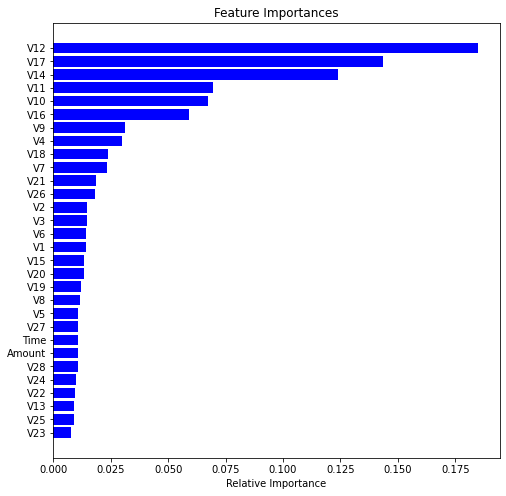

In [ ]:
# Graph of predictive strength of each variable
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [Features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()